In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

         X1        X2  Class
0  1.681208  4.540495      0
1  1.143424  5.932835      0
2  1.819258  5.115418      0
3  1.622435  4.694554      0
4  2.354241  5.160935      0


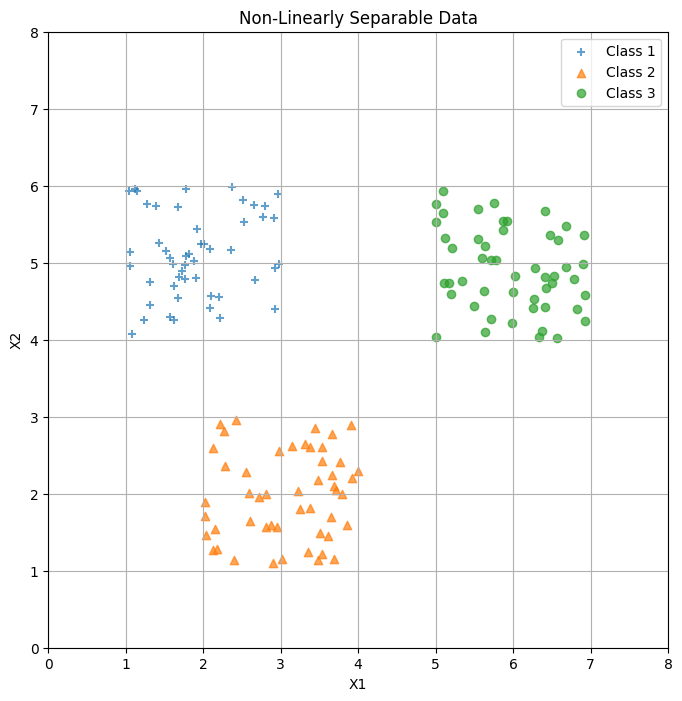

In [2]:
df = pd.read_csv('non_linear_data.csv')

print(df.head())

plt.figure(figsize=(8, 8))
plt.scatter(df[df['Class'] == 0]['X1'], df[df['Class'] == 0]['X2'], label='Class 1', alpha=0.7, marker='+')
plt.scatter(df[df['Class'] == 1]['X1'], df[df['Class'] == 1]['X2'], label='Class 2', alpha=0.7, marker='^')
plt.scatter(df[df['Class'] == 2]['X1'], df[df['Class'] == 2]['X2'], label='Class 3', alpha=0.7, marker='o')
plt.title("Non-Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend()
plt.grid(True)
plt.show()

In [3]:
X = np.column_stack((df['X1'], df['X2']))

Y = np.zeros((len(df), 3))
for i, label in enumerate(df['Class']):
    Y[i, label] = 1

In [26]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 3
        hiddenLayerNeurons2 = 3
        hiddenLayerNeurons3 = 3
        outLayerNeurons = 3

        self.learning_rate = 0.02

        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def feedForward(self, X):
        # Forward pass through all layers
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y, epochs=1000):
        for _ in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)


100%|██████████| 10000/10000 [24:51<00:00,  6.71it/s]


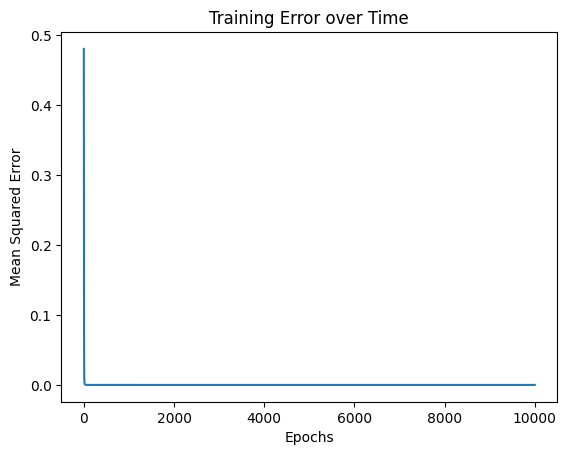

In [33]:
from tqdm import tqdm
NN = NeuralNetwork()
err = []

for i in tqdm(range(10000)):
    NN.train(X, Y)
    predictions = NN.feedForward(X)
    loss = np.mean(np.sum((Y - predictions) ** 2, axis=1))
    err.append(loss)

plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error over Time')
plt.show()

In [61]:
import pandas as pd
import numpy as np

def create_prediction_table(X, y, model, filename="predictions.xlsx"):
    true_labels = [np.argmax(label) for label in y]

    inputs = []
    predicted_labels = []
    confidences = []

    for i in range(len(X)):
        img = X[i]
        true_label = true_labels[i]

        predictions = model.feedForward(img.reshape(1, -1))

        predicted_class = np.argmax(predictions)
        confidence = predictions[0][predicted_class]

        inputs.append(img)
        predicted_labels.append(predicted_class)
        confidences.append(confidence)

    df = pd.DataFrame({
        'Input (X1, X2)': inputs,
        'True Label': true_labels,
        'Predicted Label': predicted_labels,
        'Confidence Score': confidences
    })

    df.to_excel(filename, index=False)
    print(f"Prediction table saved to {filename}")
create_prediction_table(X, Y, NN, "predictions.xlsx")


Prediction table saved to predictions.xlsx


In [64]:
np.set_printoptions(suppress=True)
test_input = np.array([2.92, 4.40])

predicted_output = NN.feedForward(test_input.reshape(1, -1))
print("Prediction for input [1.16828, 5.939169]:", predicted_output)

Prediction for input [1.16828, 5.939169]: [[0.99993072 0.00005977 0.00000951]]


In [65]:
import pandas as pd

df = pd.read_excel("predictions.xlsx")

print(df.to_string())

              Input (X1, X2)  True Label  Predicted Label  Confidence Score
0    [1.68120833 4.54049538]           0                0          1.000000
1    [1.14342378 5.93283477]           0                0          1.000000
2    [1.81925779 5.11541765]           0                0          1.000000
3    [1.62243499 4.69455408]           0                0          1.000000
4    [2.35424128 5.1609352 ]           0                0          1.000000
5      [2.2115585 4.2783934]           0                0          0.999998
6    [1.72918746 4.8880875 ]           0                0          1.000000
7    [1.43578511 5.25246864]           0                0          1.000000
8    [2.97607193 4.97779566]           0                0          1.000000
9    [1.90800324 4.8035576 ]           0                0          1.000000
10   [2.37654847 5.98769678]           0                0          1.000000
11   [1.28110594 5.76062952]           0                0          1.000000
12   [1.9711